In [2]:
import keras
import matplotlib.pyplot as plt
from keras.datasets import boston_housing

keras.__version__

Using TensorFlow backend.


'2.2.0'

In [3]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

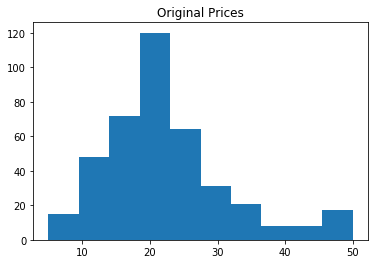

In [4]:
plt.hist(y_train) 
plt.title("Original Prices") 
plt.show()

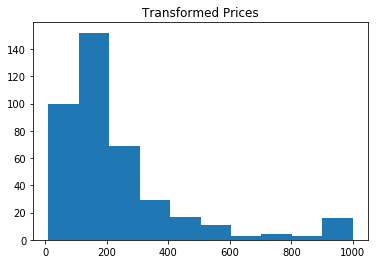

In [5]:
plt.hist((y_train*1000)**2/2500000) 
plt.title("Transformed Prices") 
plt.show()

In [7]:
from keras import backend as K

def MLAE(y_true, y_pred):    
    first_log = K.log(K.clip(y_pred*1000, K.epsilon(), None) + 1.)
    second_log = K.log(K.clip(y_true*1000, K.epsilon(), None) + 1.)    
    return K.mean(K.abs(first_log - second_log), axis=-1)


def MSLAE(y_true, y_pred):    
    first_log = K.log(K.clip(y_pred*1000, K.epsilon(), None) + 1.)
    second_log = K.log(K.clip(y_true*1000, K.epsilon(), None) + 1.)    
    return K.mean(K.square(first_log - second_log), axis=-1)

In [8]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# transform the training and test labels
y_train = (y_train*1000)**2/2500000
y_test = (y_test*1000)**2/2500000

In [9]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

In [10]:
losses = ['mean_squared_error', 'mean_squared_logarithmic_error', MLAE, MSLAE]

model.compile(optimizer='rmsprop',
              loss=losses[0],
              metrics=['mae'])

In [11]:
history = model.fit(x_train,
                    y_train,
                    epochs=100,
                    batch_size=5,
                    validation_split = .2,
                    verbose=0)

results = model.evaluate(x_test, y_test, verbose = 0)
results

[16896.791973039217, 78.47782179888557]

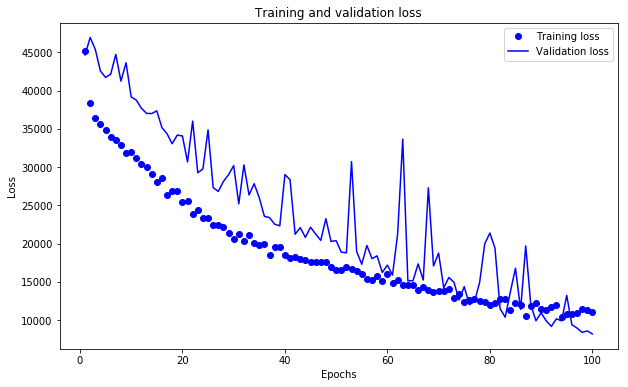

In [12]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10,6)) 
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()